HEATMAP

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import seaborn as sns
import os

In [93]:
df = pd.read_csv('/home/l2brb/main/DECpietro/evaluation/conformance/clustering/bpic15.csv', header=0, delimiter='\t')
#print(df.head())


Clustering on fitness values

In [97]:
df = df[df.iloc[:, 10] != 1]
trace_fitness = df.iloc[:, 10].values.reshape(-1, 1)
Z = linkage(trace_fitness, method='ward')
clusters = fcluster(Z, t=5, criterion='maxclust')
df['Cluster'] = clusters

Dendrogram

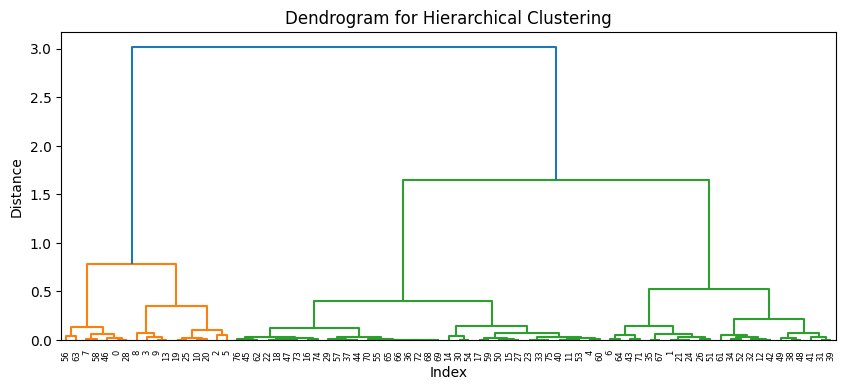

In [98]:
plt.figure(figsize=(10, 4))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Index")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()

In [113]:
df_subset = df.iloc[:, [0, 10, 15]]
df_subset.columns = ['Constraint', 'Fitness', 'Cluster']
#print(df_subset)

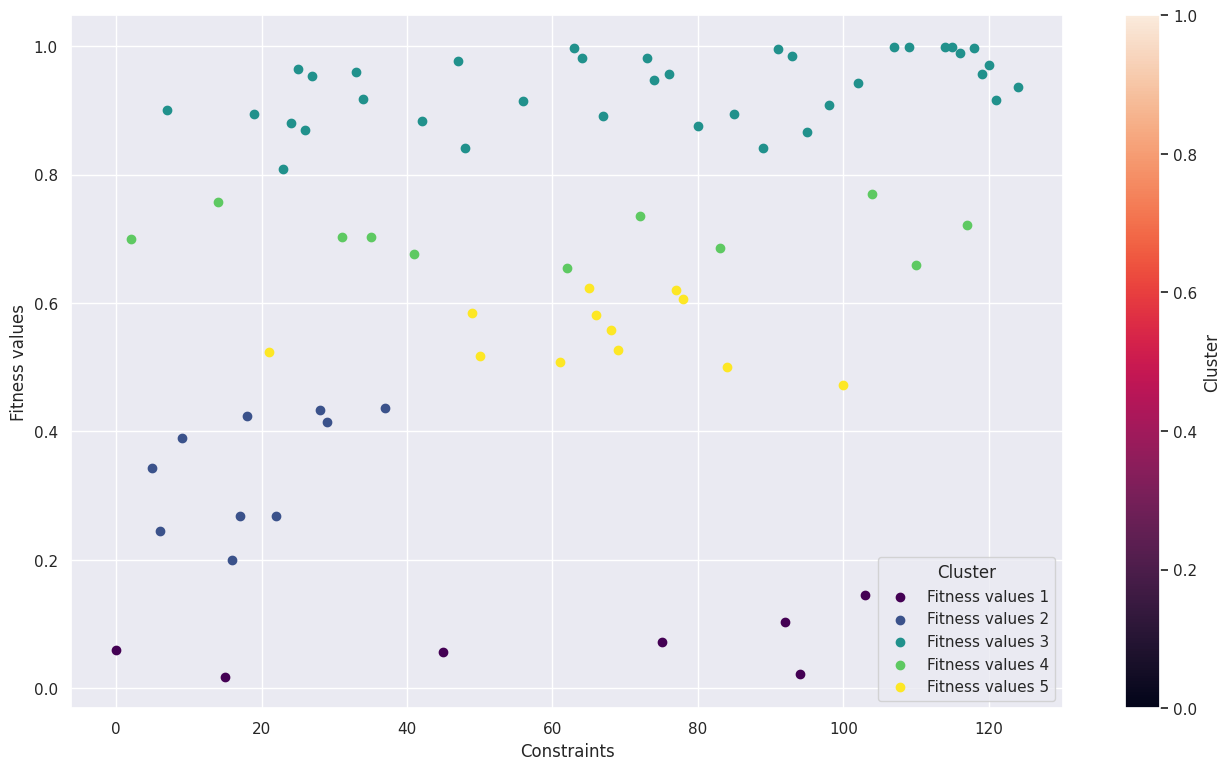

In [ ]:
unique_clusters = np.sort(df_subset['Cluster'].unique())

cmap = plt.get_cmap("viridis")
colors = [cmap((cl - unique_clusters.min())/(unique_clusters.max()-unique_clusters.min())) for cl in unique_clusters]


plt.figure(figsize=(16, 9))
sns.set_theme()

for cl, col in zip(unique_clusters, colors):
    ix = df_subset['Fitness'] == cl
    plt.scatter(df_subset.index[ix], df_subset['Fitness'][ix], c=[col], label=f"Fitness values {cl}")


plt.legend(title="Cluster", loc="lower right")


plt.xlabel("Constraints")
plt.ylabel("Fitness values")
plt.colorbar(label='Cluster')
plt.grid(True)


#plt.xlim(left=0)  
#plt.ylim(bottom=0) 


plt.show()

SUBSET W/CONSTRAINT, FITNESS VALUES AND CLUSTER

HEATMAP W/MEAN VALUES BY GROUP

In [12]:
mean_fitness = df_subset.groupby('Cluster')['Fitness'].mean()

BOXPLOT + SWARMPLOT

/tmp/ipykernel_3528270/2884529599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Fitness', data=df_subset, palette='viridis')


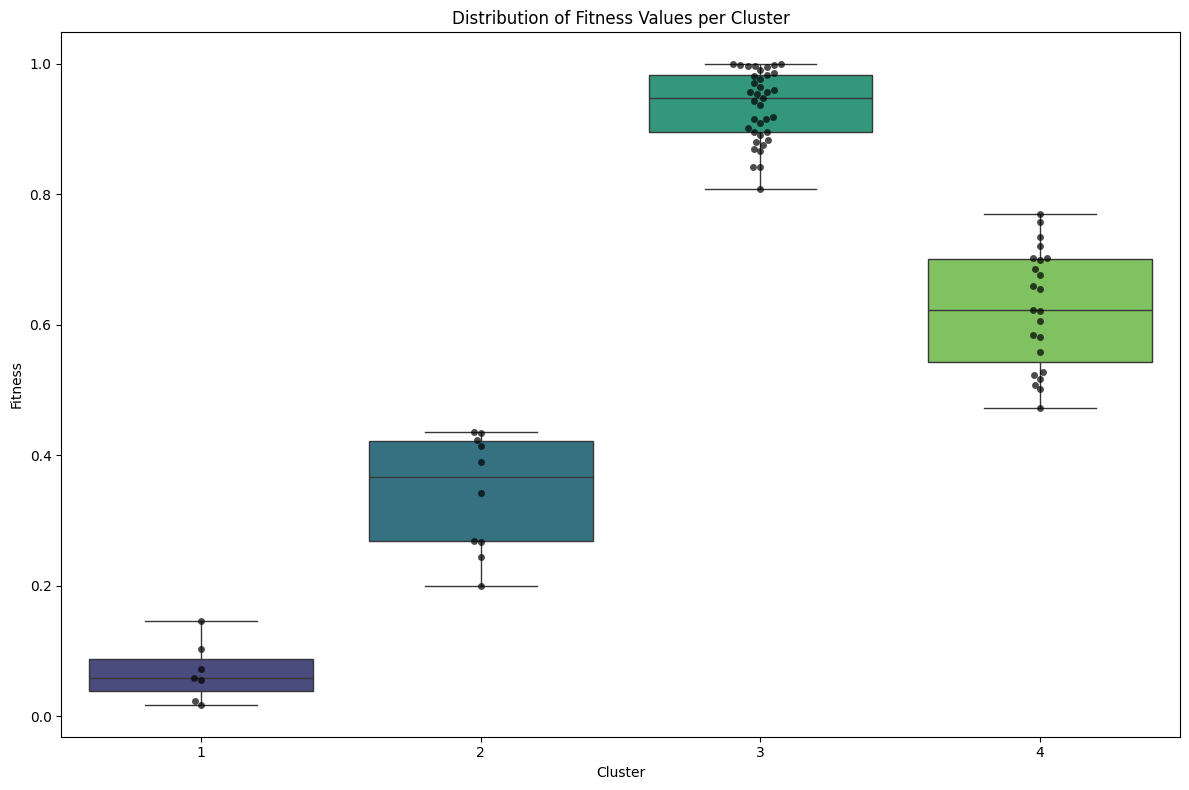

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Fitness', data=df_subset, palette='viridis')
sns.swarmplot(x='Cluster', y='Fitness', data=df_subset, color='black', alpha=0.7)
plt.title("Distribution of Fitness Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Fitness")
plt.tight_layout()
plt.show()

HEATMAP

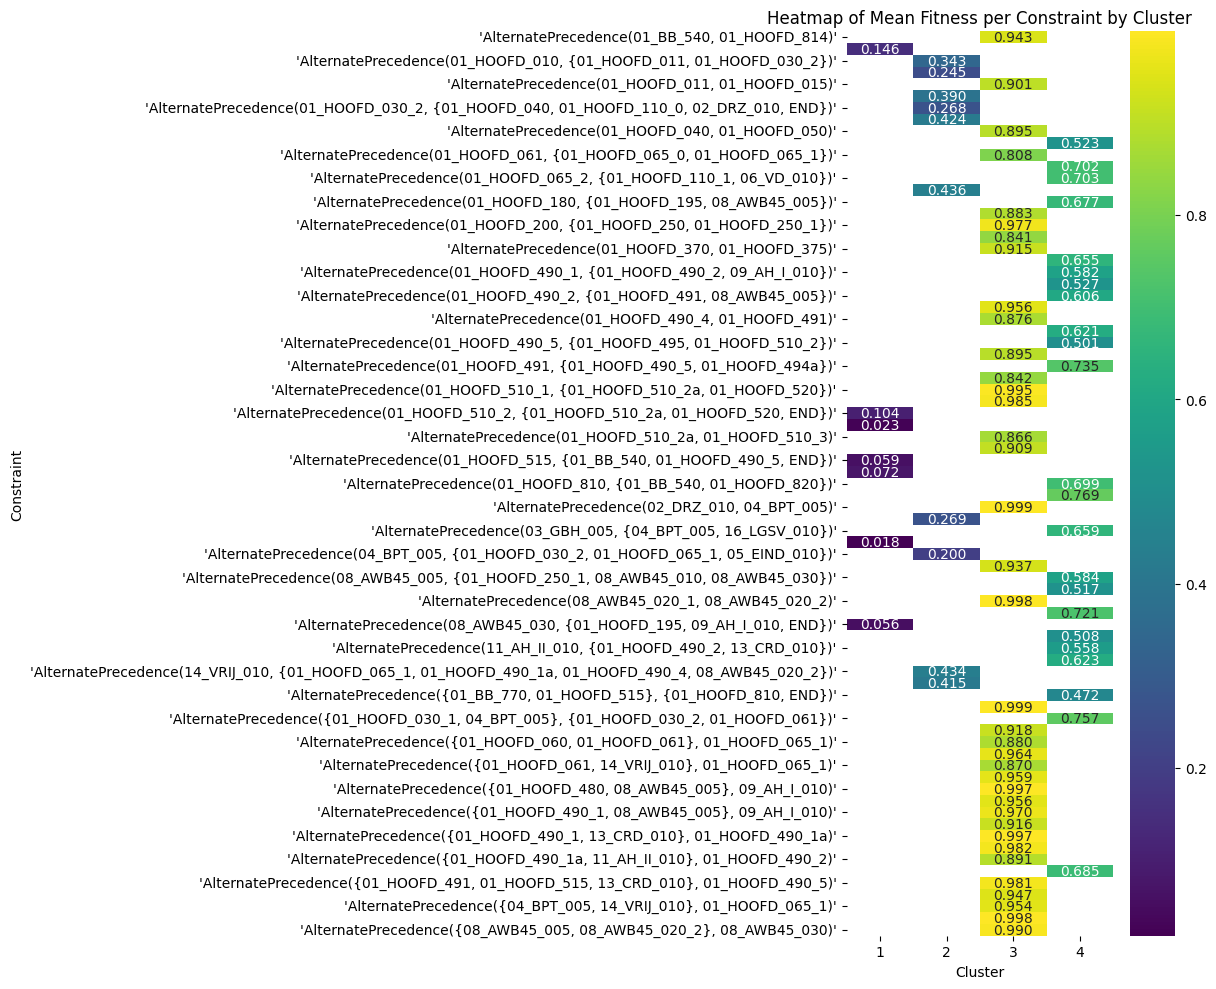

In [15]:
pivot_table = df_subset.pivot_table(index='Constraint', columns='Cluster', values='Fitness', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
plt.title("Heatmap of Mean Fitness per Constraint by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Constraint")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

FITNES VALUTE PER SUBLOG W/CONTRAINT GROUPING

In [68]:
directory = '/home/l2brb/main/DECpietro/evaluation/conformance/clustering/output_minerful_100'
df_subset = df_subset.copy()

sublog_counter = 1

# Cicliamo su ogni file CSV nella directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # Leggiamo il CSV; assumiamo che il delimitatore sia ';'
        df_sub = pd.read_csv(filepath, header=0, delimiter=';')
        
        # Creiamo un dizionario per mappare ciascun constraint al valore di fitness
        # In ciascun CSV il nome del constraint è nella prima colonna (posizione 0)
        # e il valore di fitness è nella colonna in posizione 10 (ossia, df.iloc[10])
        fitness_map = {}
        for idx, row in df_sub.iterrows():
            # Verifichiamo che la riga abbia almeno 11 colonne per evitare errori
            if len(row) > 10:
                constraint_name = row.iloc[0]
                fitness_value = row.iloc[10]
                fitness_map[constraint_name] = fitness_value
        
        # Costruiamo il nome della nuova colonna (es. "fitness_sublog_1", "fitness_sublog_2", ecc.)
        new_column_name = f'fitness_sublog_{sublog_counter}'
        # Usiamo la colonna 'Constraint' di df_subset per mappare il valore di fitness dal dizionario creato;
        # se il constraint non è presente, il valore sarà NaN (campo vuoto)
        df_subset[new_column_name] = df_subset['Constraint'].map(fitness_map)
        
        sublog_counter += 1

#print(df_subset.head())
print(df_subset.columns)
print(df_subset.shape)
df_subset.to_csv('/home/l2brb/main/DECpietro/evaluation/conformance/clustering/cluster_slider.csv', index=False)

Index(['Constraint', 'Fitness', 'Cluster', 'fitness_sublog_1',
       'fitness_sublog_2', 'fitness_sublog_3', 'fitness_sublog_4',
       'fitness_sublog_5', 'fitness_sublog_6', 'fitness_sublog_7',
       'fitness_sublog_8', 'fitness_sublog_9', 'fitness_sublog_10'],
      dtype='object')
(77, 13)


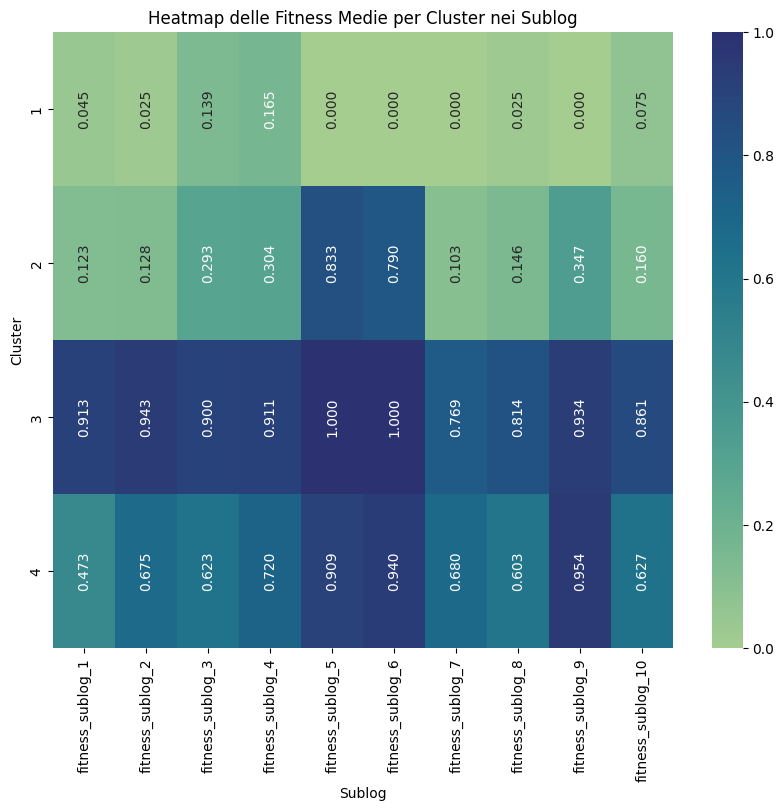

In [69]:
sublog_columns = [col for col in df_subset.columns if col.startswith("fitness_sublog_")]

# Raggruppiamo per cluster e calcoliamo la media per ciascuna colonna di sublog
df_mean = df_subset.groupby("Cluster")[sublog_columns].mean()

# Visualizziamo la heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_mean, annot=True, fmt=".3f", cmap="crest")
for t in ax.texts:
    t.set_rotation(90)
plt.title("Heatmap delle Fitness Medie per Cluster nei Sublog")
plt.xlabel("Sublog")
plt.ylabel("Cluster")
plt.show()

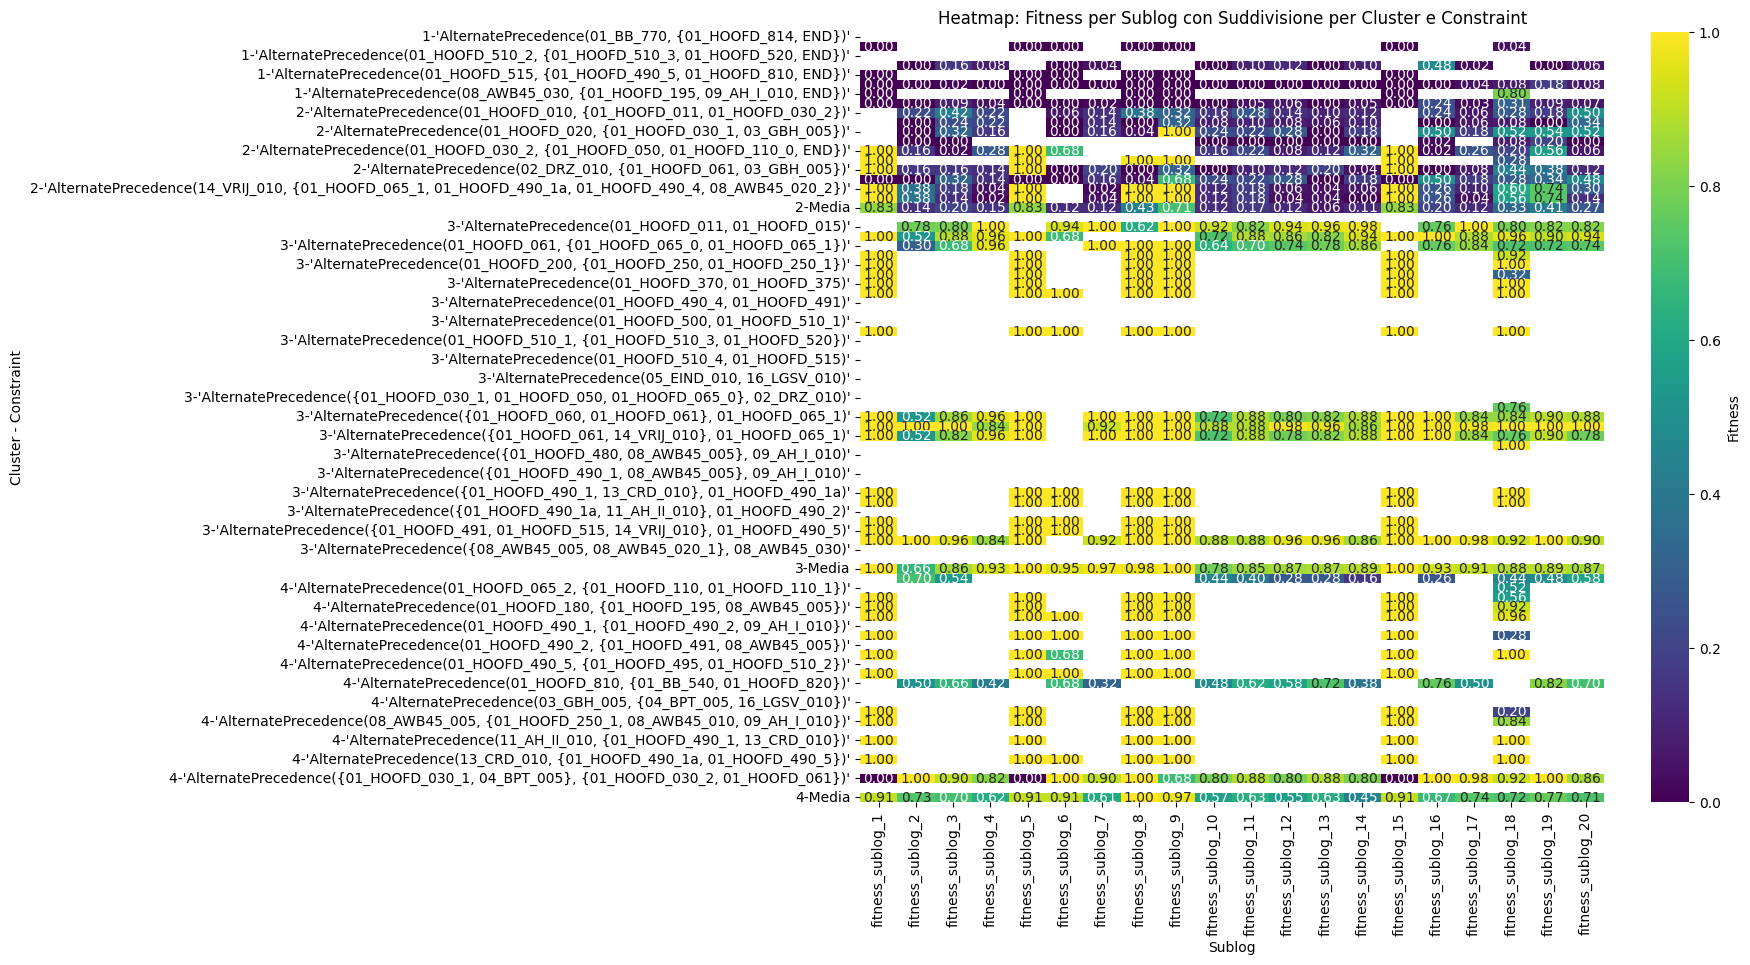

In [64]:

# Supponiamo che df_subset abbia le colonne:
# 'Constraint', 'Fitness', 'Cluster' ed anche le colonne "fitness_sublog_1", "fitness_sublog_2", ecc.
# Se non lo hai già fatto, identifica le colonne dei sublog:
sublog_columns = [col for col in df_subset.columns if col.startswith("fitness_sublog_")]

# Calcola la media per cluster (aggregata)
df_cluster_avg = df_subset.groupby('Cluster')[sublog_columns].mean()
# Aggiungi una colonna per indicare che si tratta della media del cluster
df_cluster_avg['Constraint'] = 'Media'
# Riorganizza in modo da avere un MultiIndex (Cluster, Constraint)
df_cluster_avg = df_cluster_avg.reset_index().set_index(['Cluster', 'Constraint'])

# Calcola i valori per ogni constraint (dettaglio)
df_constraints = df_subset.groupby(['Cluster', 'Constraint'])[sublog_columns].mean()

# Unisci i due DataFrame: per ogni cluster, la riga "Media" e poi i constraint
df_combined = pd.concat([df_cluster_avg, df_constraints]).sort_index(level=0)

# Visualizza la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_combined, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Fitness'})
plt.title("Heatmap: Fitness per Sublog con Suddivisione per Cluster e Constraint")
plt.xlabel("Sublog")
plt.ylabel("Cluster - Constraint")
plt.yticks(rotation=0)
plt.show()